# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 37

**Author 1 (sciper):** Elias De Smijter (366670)  
**Author 2 (sciper):** Félicie Alice Agnès Marie Giraud-Sauveur (284220)   
**Author 3 (sciper):** Cyril Felix Monette (299554)

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
# Imports

import numpy as np
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

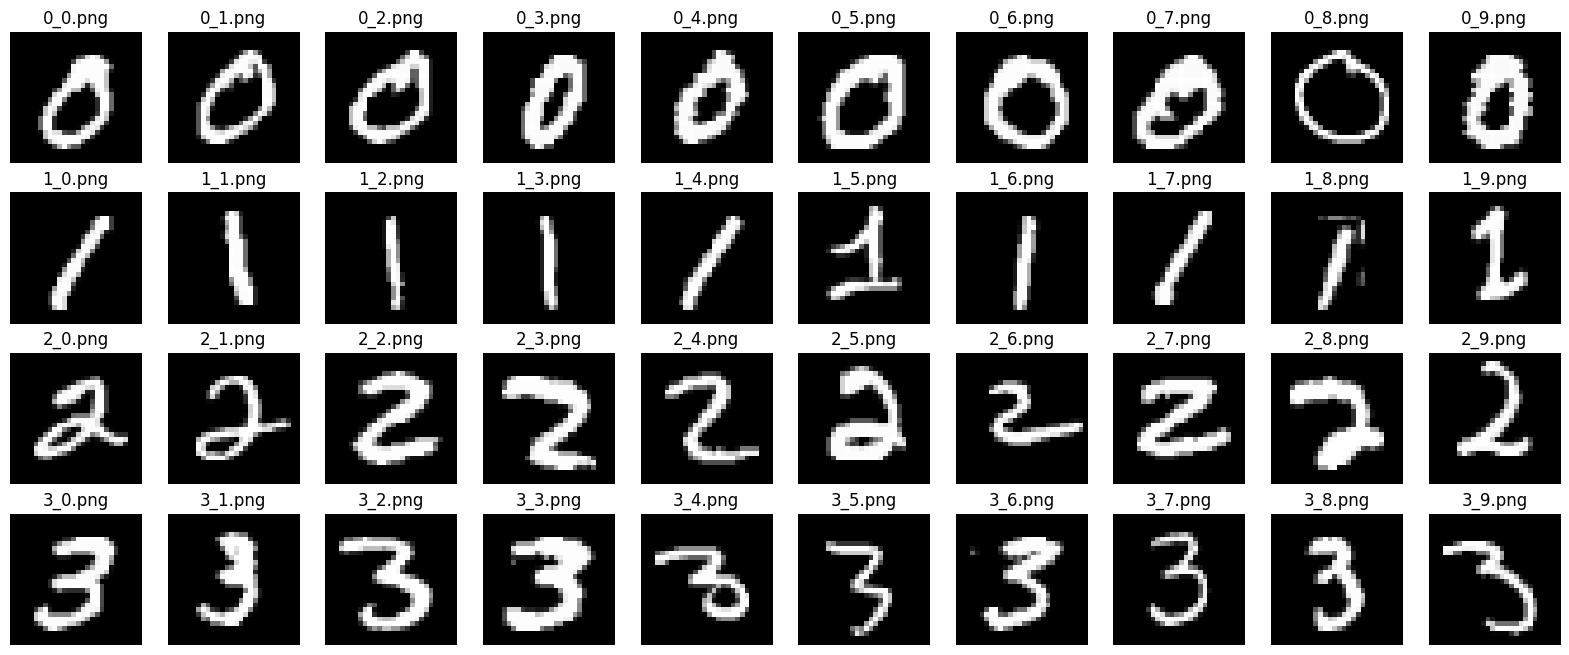

In [3]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

/Users/eliasdesmijter/miniconda3/envs/EE451/lib/python3.11/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Users/eliasdesmijter/miniconda3/envs/EE451/lib/python3.11/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


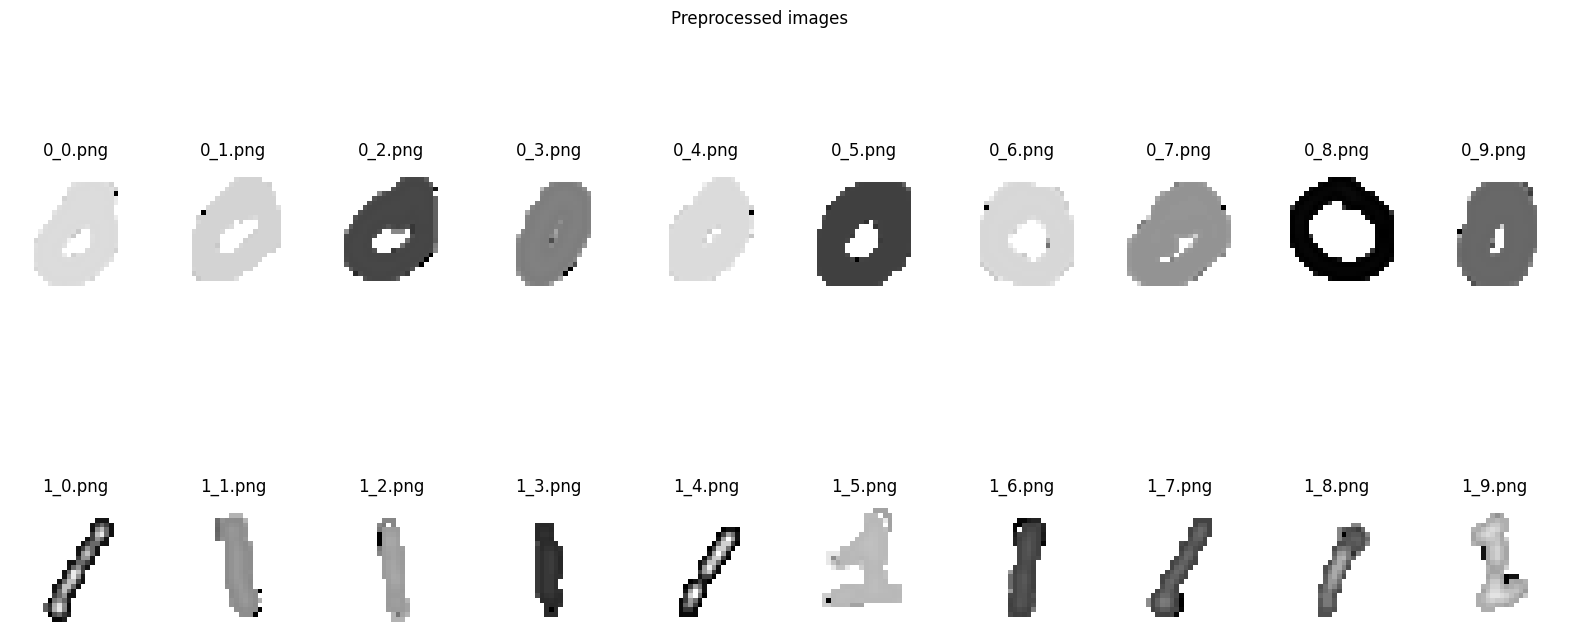

In [4]:
from scipy.signal import wiener
from skimage.filters import median
import cv2
from skimage.morphology import remove_small_objects

# Pre-processing: Wiener filtering

    # lists below with your preprocessed images of "0"s and "1"s
zeros = []
ones = []

    # pre-process, fill lists and plot
fig, axes = plt.subplots(2, len(zeros_im), figsize=(20, 8))

for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    im_preprocessed = wiener(median(im.copy()),3)
    zeros.append(im_preprocessed)
    ax.imshow(im_preprocessed, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    im_preprocessed = wiener(remove_small_objects(cv2.convertScaleAbs(median(im.copy())), min_size=3), 3)
    ones.append(im_preprocessed)
    ax.imshow(im_preprocessed, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

**GIVE ARGUMENTS ON THE CHOSEN TECHNIQUES**

* For the zeros: We first applied a median filter to smoothen the edges, this should reduce the high-frequency fourier descriptors in the next step. After that, we applied a wiener filter because it is a theoretically optimal filter.

* For the ones: Again, we first applied a median filter to smoothen the edges. After this, we removed small objects. The main reason for this is image 1_8.png where there are some artifacts around the written one. We ended preprocessing again with a Wiener filter.

### 1.2. Get descriptors (4 pts)

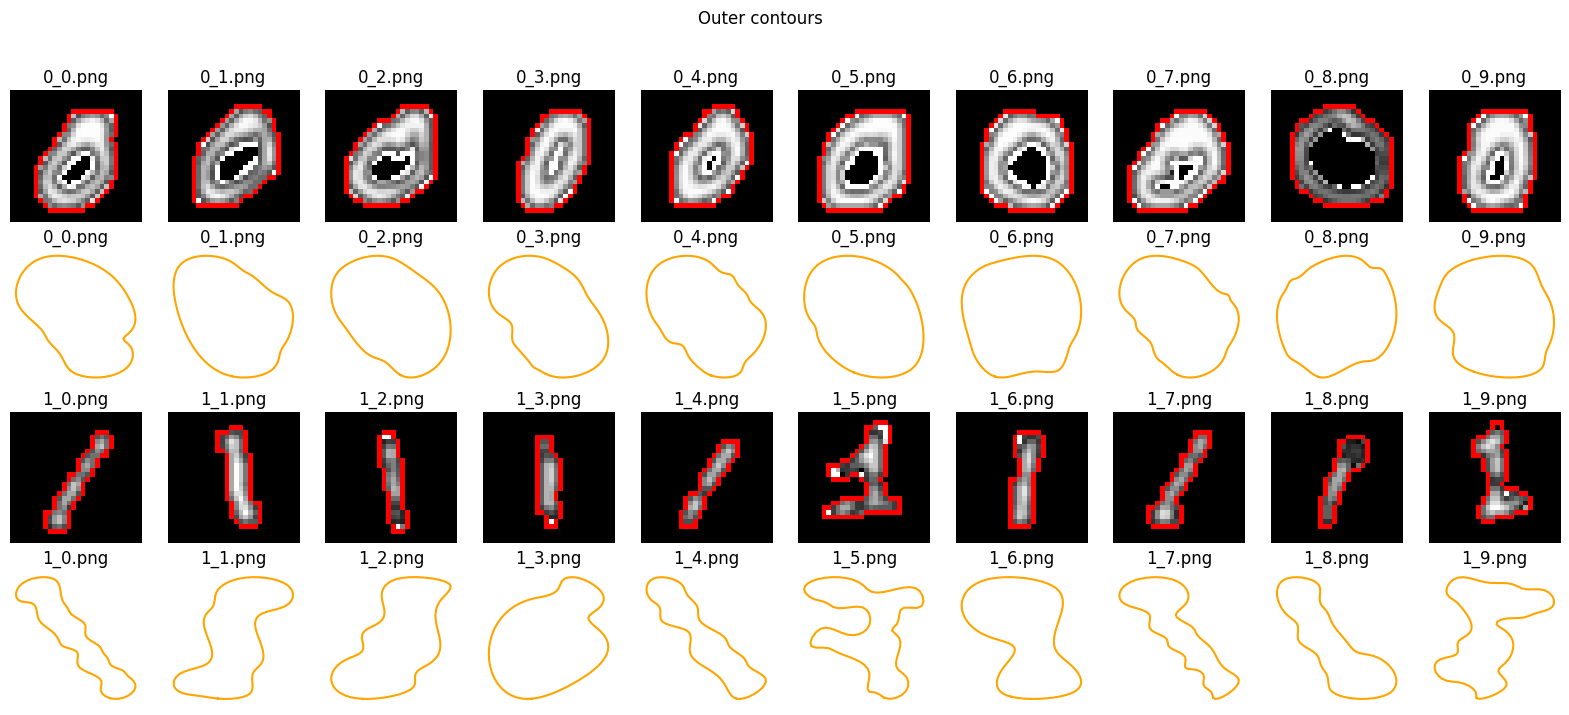

In [19]:
from scipy import interpolate
# Find contours


    # lists with contours
zeros_Co = []
ones_Co = []

    # Find contours, fill lists and plot
fig, axes = plt.subplots(4, len(zeros), figsize=(20, 8))

for ax0, ax1, im, nm in zip(axes[0], axes[1], zeros, zeros_names):
    im_contours = im.copy()
    im_contours = cv2.convertScaleAbs(im_contours)
    Co, _ = cv2.findContours(im_contours, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    zeros_Co.append(Co)
    im_contours = cv2.cvtColor(im_contours, cv2.COLOR_GRAY2BGR)
    
    xco = Co[0].T[0][0]
    yco = Co[0].T[1][0]
    data = np.array(list(zip(xco, yco)))
    tck,u = interpolate.splprep(data.transpose(), s=1, per=1)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck)
    
    ax0.imshow(cv2.drawContours(im_contours, Co, -1, (255, 0, 0), 1))
    ax1.plot(out[0], out[1], color='orange')
    
    ax0.axis('off')
    ax0.set_title(nm)
    ax1.axis('off')
    ax1.set_title(nm)

for ax0, ax1, im, nm in zip(axes[2], axes[3], ones, ones_names):
    im_contours = im.copy()
    im_contours = cv2.convertScaleAbs(im_contours)
    Co, _ = cv2.findContours(im_contours, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ones_Co.append(Co)
    im_contours = cv2.cvtColor(im_contours, cv2.COLOR_GRAY2BGR)
    
    xco = Co[0].T[0][0]
    yco = Co[0].T[1][0]
    data = np.array(list(zip(xco, yco)))
    tck,u = interpolate.splprep(data.transpose(), s=1, per=1)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck)
    
    ax0.imshow(cv2.drawContours(im_contours, Co, -1, (255, 0, 0), 1))
    ax1.plot(out[0], out[1], color='orange')
    ax0.axis('off')
    ax0.set_title(nm)
    ax1.axis('off')
    ax1.set_title(nm)

fig.suptitle("Outer contours")
plt.show()

In [52]:
import scipy

# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

def get_descriptors(img, num_points):
    descriptors = []
    # Get contour
    im_contours = cv2.convertScaleAbs(img)
    Co, _ = cv2.findContours(im_contours, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    xco = Co[0].T[0][0]
    yco = Co[0].T[1][0]
    data = np.array(list(zip(xco, yco)))

    # Interpolate contour
    tck,u = interpolate.splprep(data.transpose(), s=1)
    unew = np.linspace(0, 1, num_points)
    out = interpolate.splev(unew, tck)

    # Transform coördinates to complex numbers
    fft_in = out[0] + out[1]*1.0j
    
    # Fourier transform
    descriptors = scipy.fft.fft(fft_in)
    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(ones_im[8], 100)[:10])

[1816.93893197+1.77714683e+03j  -41.43609214-1.57437210e+01j
  -19.6258107 -4.03115568e+00j  -13.57962216-2.39227008e+00j
  -10.46203932-1.90189621e+00j   -8.51676536-1.70079426e+00j
   -7.17672227-1.60274714e+00j   -6.19347639-1.54950612e+00j
   -5.43914345-1.51845051e+00j   -4.84072737-1.49943248e+00j]


#### Discussion

**Discuss why**
- **The contours array should contain a finite number of equi-distant points for each image**
    * The points should be equi-distant, because otherwise the 'reference-frequency' is not the same across the entire image. Example: if two pairs of points differ 5 grayscale-values, the fourier transform will assign the same frequency to both pairs because this is the only information the algorithm gets. If these pairs have different distances in the real image however (this information can't be given to the function), they should not have the same frequency! The only way to solve this, is to give equi-distant points to the algorithm.
- **In the case of "0" contours, only the outermost contour is kept**
    * TODO

### 1.3. Study effect of descriptors (6 pts)

In [53]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[8]
one = ones_im[8]

In [54]:
# TODO

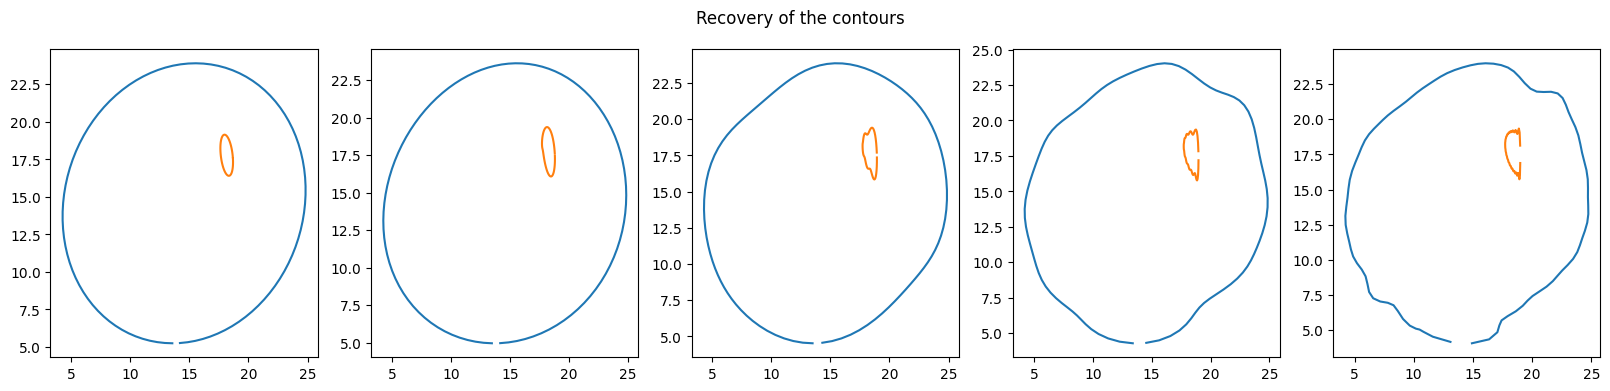

In [55]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot recovery for a zero image
descriptors_zero = get_descriptors(zero, 100)
for i in range(0,  5):
    fourier = descriptors_zero.copy()
    fourier[descr_set_sizes[i]+1:-descr_set_sizes[i]] = 0
    toplot = scipy.fft.ifft(fourier)
    xPlot = np.real(toplot)
    yPlot = np.imag(toplot)
    # TODO
    axes[i].plot(xPlot, yPlot)

# Plot recovery for a one image
descriptors_one = get_descriptors(one, 100)
for i in range(0,  5):
    fourier = descriptors_one.copy()
    fourier[descr_set_sizes[i]+1:-descr_set_sizes[i]] = 0
    toplot = scipy.fft.ifft(fourier)
    xPlot = np.real(toplot)
    yPlot = np.imag(toplot)
    # TODO
    axes[i].plot(xPlot, yPlot)

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

TODO

### 1.4 Clustering (2 pts)

In [56]:
# TODO

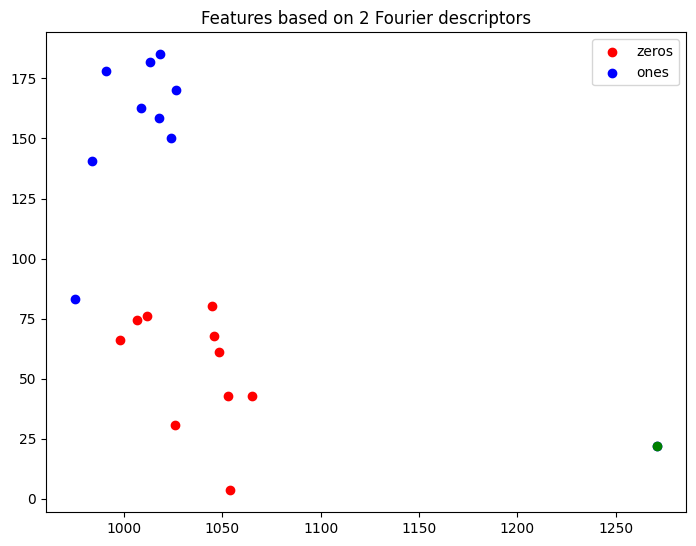

In [70]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = [np.absolute(get_descriptors(a, 50)[0]) for a in zeros_im]
# Second feature for all "0"s
zeros_f2 = [np.absolute(get_descriptors(a, 50)[1]) for a in zeros_im]
# Fist feature for all "1"s
ones_f1 = [np.absolute(get_descriptors(a, 50)[0]) for a in ones_im]
# Second feature for all "1"s
ones_f2 = [np.absolute(get_descriptors(a, 50)[1]) for a in ones_im]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.scatter(ones_f1[8], ones_f2[8], color='g')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

TODO

#### Implementation

In [79]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    descriptors = get_descriptors(img, 100)
    if inv_to_translation:
        descriptors = descriptors[1:]
    if inv_to_rotation:
        descriptors = np.absolute(descriptors)
    if inv_to_scale:
        descriptors = descriptors[1:]/descriptors[:-1]
        
    return np.absolute(descriptors)

In [80]:
import random
# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    # TODO
    return scipy.ndimage.rotate(img, random.randint(0,360))

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    # TODO
    return cv2.warpAffine(img, np.float32([[1,0, random.randint(0,10)], [0,1,random.randint(0,10)]]), img.shape)
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    # TODO
    scale_percent = random.uniform(0.1,1.50)
    width = int(img.shape[1]*scale_percent)
    height = int(img.shape[0]*scale_percent)
    dim = (width, height)
    return cv2.resize(img, dim)

In [81]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = [random_rotate(img) for img in zeros_im]
rotated_images_ones = [random_rotate(img) for img in ones_im]

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(img) for img in zeros_im]
translated_images_ones = [random_translate(img) for img in ones_im]

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(img) for img in zeros_im]
scaled_images_ones = [random_scale(img) for img in ones_im]

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = [random_scale(random_translate(random_rotate(img))) for img in zeros_im]
transformed_images_ones = [random_scale(random_translate(random_rotate(img))) for img in ones_im]

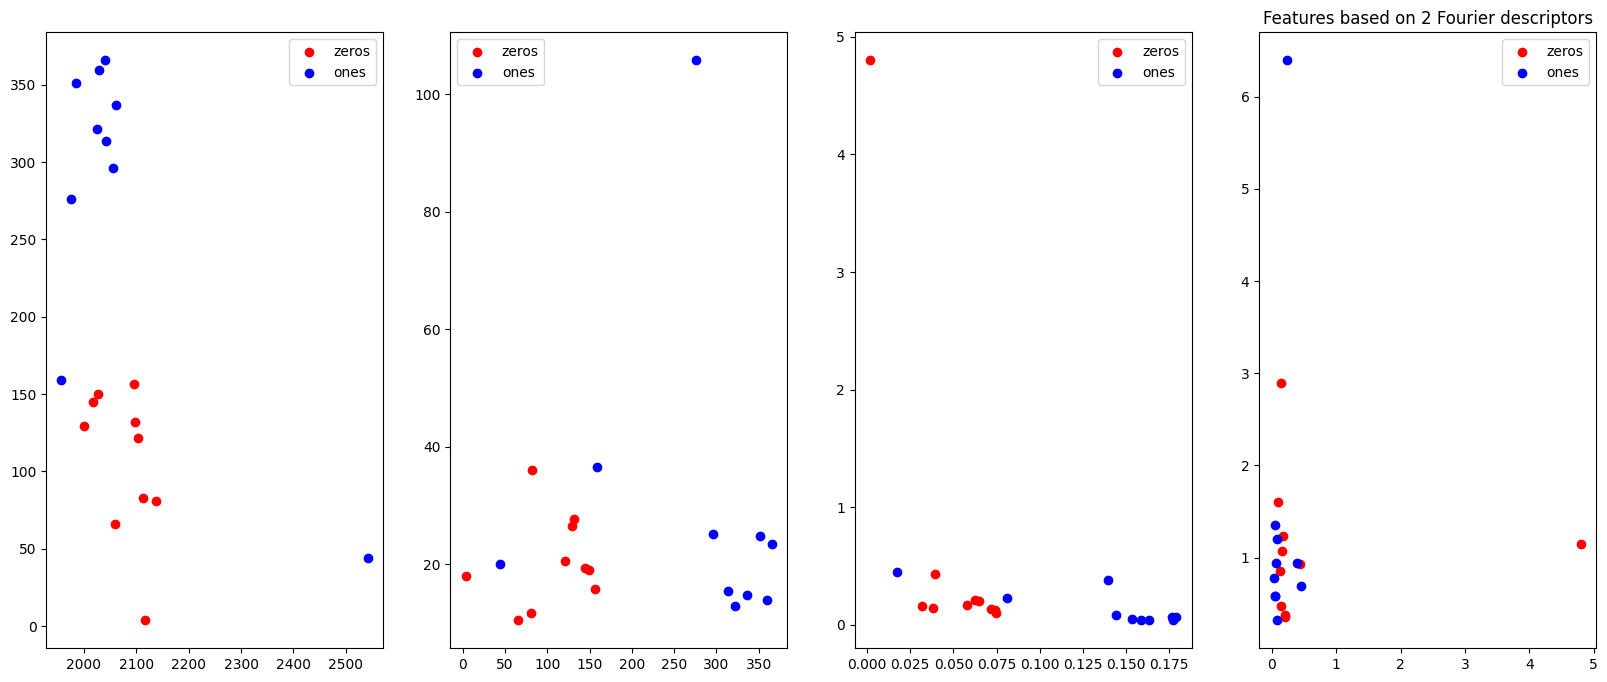

In [82]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


# TODO
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
temp = [(True, False, False), (False, True, False), (False, False, True), (True, True, True)]
for i in range(4):
    # First feature for all "0"s
    zeros_f1 = [get_invariant_features(a, temp[i][0], temp[i][1], temp[i][2])[0] for a in zeros_im]
    # Second feature for all "0"s
    zeros_f2 = [get_invariant_features(a, temp[i][0], temp[i][1], temp[i][2])[1] for a in zeros_im]
    # Fist feature for all "1"s
    ones_f1 = [get_invariant_features(a, temp[i][0], temp[i][1], temp[i][2])[0] for a in ones_im]
    # Second feature for all "1"s
    ones_f2 = [get_invariant_features(a, temp[i][0], temp[i][1], temp[i][2])[1] for a in ones_im]

    # Plot features for all images
    axes[i].scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    axes[i].scatter(ones_f1, ones_f2, color='b', label='ones')
    axes[i].legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

**Pre-processing**

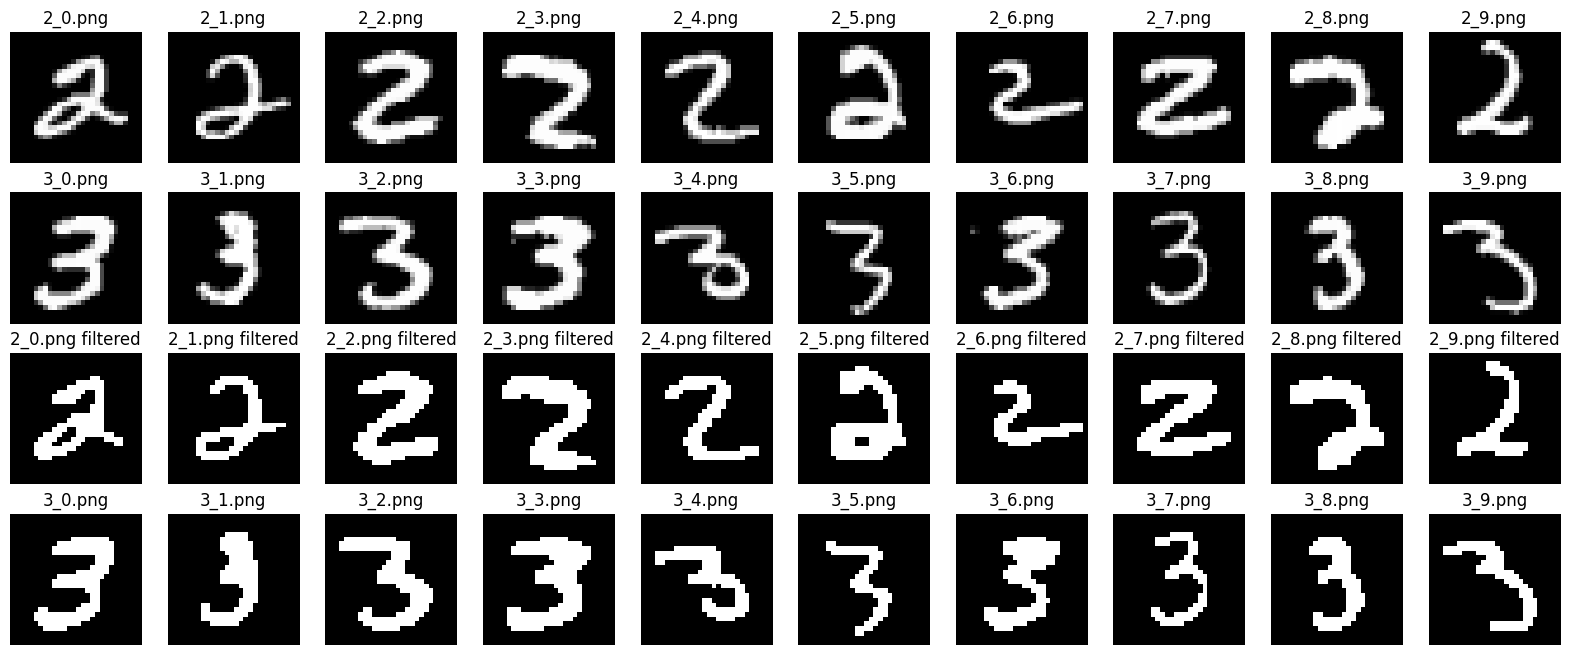

In [27]:
# TODO
from skimage.filters import median
from skimage.morphology import closing, opening, disk, remove_small_holes, remove_small_objects

# Plot original images:
fig, axes = plt.subplots(4, len(twos_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

# Binarise images:
twos_im_b=np.zeros_like(twos_im)
for i,im in enumerate(twos_im):
    twos_im_b[i]=np.where(im >= 90, 1, 0)

threes_im_b=np.zeros_like(threes_im)
for i,im in enumerate(threes_im):
    threes_im_b[i]=np.where(im >= 90, 1, 0)

# median filtering:
twos_im_filtered=np.zeros_like(twos_im_b)
for i,im in enumerate(twos_im_b):
    twos_im_filtered[i]=median(im, disk(1))

threes_im_filtered=np.zeros_like(threes_im_b)
for i,im in enumerate(threes_im_b):
    threes_im_filtered[i]=median(im, disk(1))

# Plot filtered images:
for ax, im, nm in zip(axes[2], twos_im_filtered, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm+" filtered")
for ax, im, nm in zip(axes[3], threes_im_filtered, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

plt.show()

**Contour extraction**

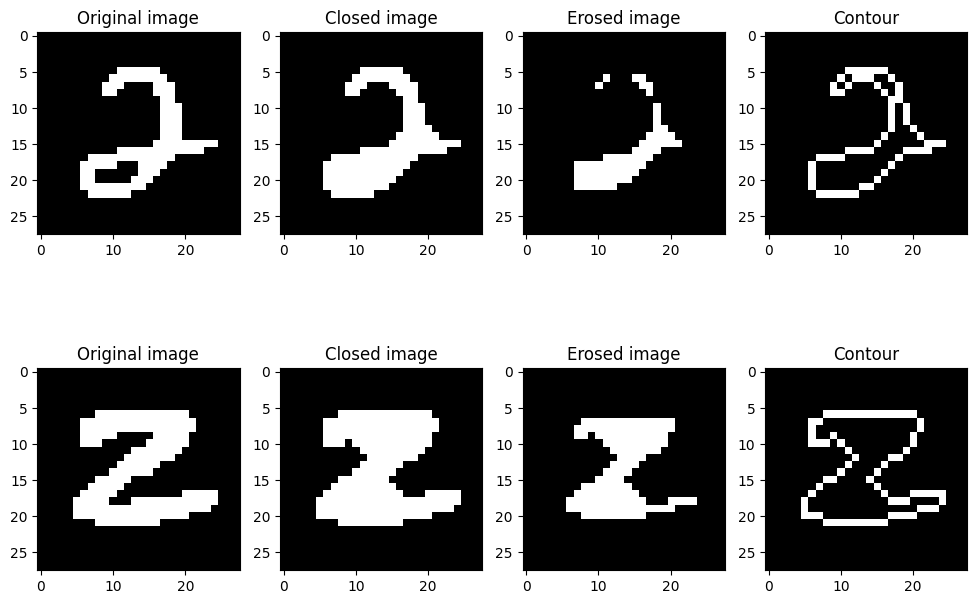

In [29]:
# First try a custom contour extraction

from skimage.morphology import square
from skimage.morphology import erosion

sample_images=[twos_im_filtered[1],twos_im_filtered[7]]

fig,axes=plt.subplots(2,4,figsize=(12,8))
for i,im in enumerate(sample_images):
    axes[i,0].imshow(im, cmap='gray')
    axes[i,0].set_title("Original image")

    axes[i,1].imshow(closing(im,selem=disk(2)), cmap='gray')
    axes[i,1].set_title("Closed image")

    axes[i,2].imshow(erosion(closing(im,selem=disk(2))), cmap='gray')
    axes[i,2].set_title("Erosed image")

    axes[i,3].imshow(closing(im,selem=disk(2))-erosion(closing(im,selem=disk(2))), cmap='gray')
    axes[i,3].set_title("Contour")

**This way of finding contours has the disadvantage of requiring a closing before erosion to avoid having inner contours included in the final contour. However, this also impacts the outer contour by smoothing sharp angles and thus overall reducing the length of the perimeter.**

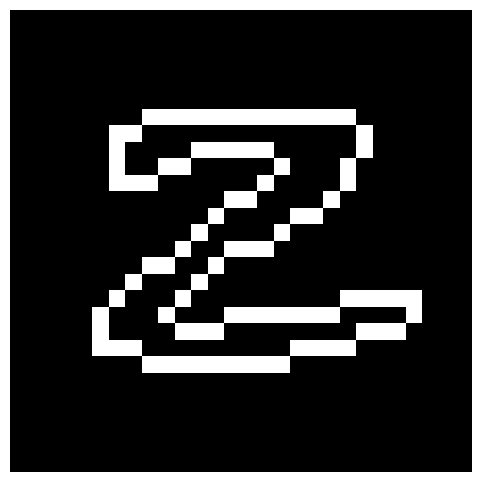

In [30]:
#Now let's try with another contour extraction process

import cv2 as cv

image = np.copy(twos_im_filtered[7])
contours, hierarchy = cv.findContours(image, cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
border=cv.drawContours(np.zeros_like(image), contours, 0, 1, 1)

fig = plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(border, cmap='gray')  #without the code, only an array displayed in the console

In [31]:
# Perimeter and area functions

#Perimeter function using custom contour detection
def perimeter1(image):
    border=closing(image,selem=disk(2))
    border=erosion(border)
    border=closing(image,selem=disk(2))-border
    return np.sum(border)

# Perimeter function using cv2 contour detection
def perimeter2(image):
    contours, hierarchy = cv.findContours(image, cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
    border=cv.drawContours(np.zeros_like(image), contours, 0, 1, 1)
    return np.sum(border)

def area(image):
    return np.sum(image)

In [32]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [perimeter1(two_im) for two_im in twos_im_filtered]
twos_f1_bis = [perimeter2(two_im) for two_im in twos_im_filtered]
twos_f2 = [area(two_im) for two_im in twos_im_filtered]

threes_f1 = [perimeter1(three_im) for three_im in threes_im_filtered]
threes_f1_bis = [perimeter2(three_im) for three_im in threes_im_filtered]
threes_f2 = [area(three_im) for three_im in threes_im_filtered]

# Plot features for all images
fig, axes = plt.subplots(1,2, figsize=(12,10))
axes[0].scatter(twos_f1, twos_f2, color='r', label='twos')
axes[0].scatter(threes_f1, threes_f2, color='b', label='threes')
axes[0].set_xlabel("Perimeter 1")
axes[0].set_ylabel("Area")
axes[0].legend(loc='best')

axes[1].scatter(twos_f1_bis, twos_f2, color='r', label='twos')
axes[1].scatter(threes_f1_bis, threes_f2, color='b', label='threes')
axes[1].set_xlabel("Perimeter 2")
axes[1].set_ylabel("Area")
axes[1].legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

TypeError: closing() got an unexpected keyword argument 'selem'

In [ ]:
# TODO: Make the 1D plot of the compacity

def compacity(area,perimeter):
    return perimeter*perimeter/area

twos_f1 = [perimeter(two_im) for two_im in twos_im_filtered]
twos_f2 = [area(two_im) for two_im in twos_im_filtered]
threes_f1 = [perimeter(three_im) for three_im in threes_im_filtered]
threes_f2 = [area(three_im) for three_im in threes_im_filtered]

twos_c = [compacity(area, perimeter) for perimeter, area in zip(twos_f1,twos_f2)]
threes_c = [compacity(area, perimeter) for perimeter, area in zip(threes_f1,threes_f2)]

# Plot features for all images
fig = plt.figure(figsize=(10,7))
plt.hist(twos_c, label='twos')
plt.hist(threes_c, label='threes')
plt.ylabel("Compactness")
plt.legend(loc='best')
plt.title("Compactness of 2s vs 3s")
plt.show()

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
from skimage.measure import inertia_tensor_eigvals
from math import sqrt

# Compute eigenvalues of images:
twos_eigs = [inertia_tensor_eigvals(two_im) for two_im in twos_im_filtered]
threes_eigs = [inertia_tensor_eigvals(two_im) for two_im in threes_im_filtered]

# Compute elongation of images:
twos_elongation = [sqrt(eig[0]/eig[1]) for eig in twos_eigs]
threes_elongation = [sqrt(eig[0]/eig[1]) for eig in threes_eigs]

# Plot elongation for all images
fig = plt.figure(figsize=(10,7))
plt.hist(twos_elongation, label='twos')
plt.hist(threes_elongation, label='threes')
plt.ylabel("Elongation")
plt.legend(loc='best')
plt.title("Elongation of 2s vs 3s")
plt.show()

#### Discussion

TODO